In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, loguniform
from sklearn.model_selection import train_test_split

In [2]:
!pip install wordcloud

In [3]:
data = []
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data.append(train_df)
data.append(test_df)

In [4]:
train_df.sample(5)

,id,keyword,location,text,target
7587,10841,NaN,NaN,Sirens everywhere!,0
3976,5652,flooding,Jakarta/Kuala Lumpur/S'pore,Myanmar: MSF assisting thousands as worst floo...,1
400,577,arson,"Los Angeles, CA",Owner of Chicago-Area Gay Bar Admits to Arson ...,0
5778,8245,rioting,Spare 'Oom,if they kill off Val I'm rioting #Emmerdale,0
4105,5834,hail,United States,UNR issues Severe Thunderstorm Warning [wind: ...,1


In [5]:
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_df.sample(5)

,id,keyword,location,text
546,1785,buildings%20on%20fire,Fallen TX,It's a testimony to the human spirit that more...
2506,8353,ruin,teen top ? jongsuk ? exo ? bts,fUCK I CANT WAIT TO RUIN AUBREY'S WHOLE FIC AN...
1582,5348,fire,Lakeland Fl,@traplordthings Y din u fav my fire memez åÀ!
67,224,airplane%20accident,Muscat,Horrible Accident Man Died In Wings of Airplan...
2572,8583,screams,stars/pens/caps/hawks,SCREAMS I LOVE THIS VINE https://t.co/PKnBZLHOSc


In [7]:
train_df.shape

(7613, 5)

## Data Cleaning

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
# Keyword and Location have Null values which makes them irrelevant for analysis
# Dropping these columns
for df in data:
    df.drop(columns = ['keyword', 'location'], inplace = True)

In [10]:
data[0].sample(5)

,id,text,target
4600,6542,@NEPD_Loyko Texans hope you are wrong. Radio i...,0
5667,8087,Last Chance Animal Rescue has 3 new posts. htt...,0
3938,5599,Spot Flood Combo 53inch 300W Curved Cree LED W...,0
6739,9656,I need a thunderstorm please!,0
6854,9823,Photo: lavenderpoetrycafe: The Forgotten Histo...,1


In [11]:
# Setting ID as index
for df in data:
    df.set_index('id', inplace = True)

In [12]:
#Checking for NaN and duplicates
print('NaN values in train set:', data[0].isna().sum())
print('NaN values in test set:', data[1].isna().sum())

print('Duplicate values in train set:', data[0].duplicated().sum())
print('Duplicate values in test set:', data[1].duplicated().sum())

NaN values in train set: text      0
target    0
dtype: int64
NaN values in test set: text    0
dtype: int64
Duplicate values in train set: 92
Duplicate values in test set: 20


In [13]:
# Remove duplicates from train set
data[0] = data[0].drop_duplicates(keep='first')
data[0].shape

(7521, 2)

## EDA

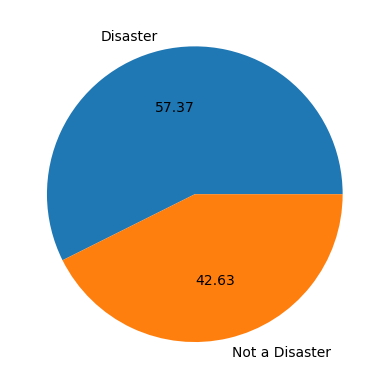

In [14]:
# Almost balanced data
plt.pie(data[0]['target'].value_counts(), labels=['Disaster', 'Not a Disaster'], autopct= "%0.2f")
plt.show()

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/avinandan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# number of characters
data[0]['num_characters']= data[0]['text'].apply(len)

# num of words
# nltk.word_tokenize() tokenizes the words of a sentence into a list... we can calculate the total number of words by length of the list
data[0]['num_words'] = data[0]['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# num of sentences
# nltk.sent_tokenize() works similarly
data[0]['num_sentences'] = data[0]['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data[0].sample(5)

/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_1841/461910529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[0]['num_characters']= data[0]['text'].apply(len)
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_1841/461910529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[0]['num_words'] = data[0]['text'].apply(lambda x: len(nltk.word_tokenize(x)))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_1841/461910529.py:10: SettingWithCopyWarning: 
A value is trying

,text,target,num_characters,num_words,num_sentences
id,,,,,
1384,Louis Vuitton Monogram Sophie Limited Edition ...,0,133,21,1
9704,I feel like a tornado http://t.co/iZJK6kpWiZ,1,44,8,1
10609,Love is the weapon for this wounded generation...,0,52,12,1
3484,So a train derailed and instead of me getting ...,1,96,22,1
1554,New Documents Found Pointing To Japan's WWII A...,1,87,14,1


In [17]:
data[0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7521.000000,7521.000000,7521.000000
mean,100.880734,18.893498,1.560032
std,33.812307,6.883044,0.968874
min,7.000000,1.000000,1.000000
25%,77.000000,14.000000,1.000000
50%,107.000000,19.000000,1.000000
75%,133.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


In [18]:
# analysing Disaster and Non Disaster tweets separately

print('Data of the Disaster tweets')
data[0][data[0]['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

Data of the Disaster tweets


,num_characters,num_words,num_sentences
count,3206.000000,3206.000000,3206.000000
mean,107.983157,19.244230,1.417342
std,29.281074,6.028424,0.796168
min,14.000000,2.000000,1.000000
25%,88.000000,15.000000,1.000000
50%,114.000000,20.000000,1.000000
75%,135.000000,24.000000,2.000000
max,151.000000,39.000000,8.000000


In [19]:
# analysing Disaster and Non Disaster tweets separately

print('Data of the Non Disaster tweets')
data[0][data[0]['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

Data of the Non Disaster tweets


,num_characters,num_words,num_sentences
count,4315.000000,4315.000000,4315.000000
mean,95.603708,18.632908,1.666049
std,35.924812,7.444845,1.067254
min,7.000000,1.000000,1.000000
25%,68.000000,13.000000,1.000000
50%,101.000000,19.000000,1.000000
75%,130.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


<Axes: xlabel='num_characters', ylabel='Count'>

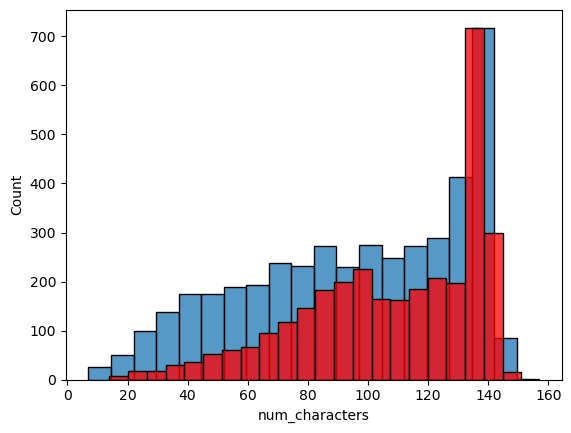

In [20]:
sns.histplot(data[0][data[0]['target']==0]['num_characters'])               # plotting number of characters for Non Disaster tweets
sns.histplot(data[0][data[0]['target']==1]['num_characters'], color="red")  # plotting number of chaarcters in Disaster tweets      

/Users/avinandan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


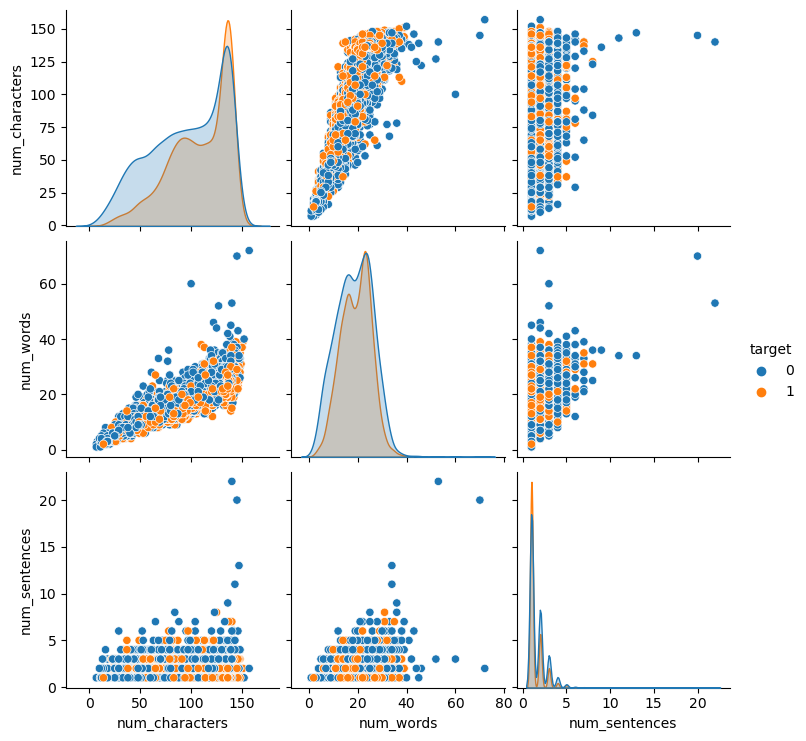

In [21]:
# plotting a pairplot to see the relation between individual features

sns.pairplot(data[0], hue='target')

<Axes: >

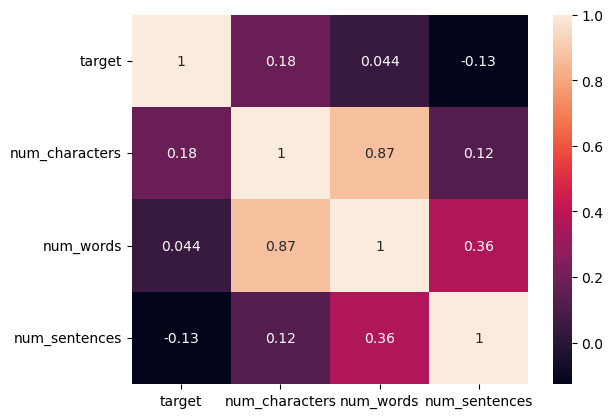

In [22]:
# plotting the heatmap
sns.heatmap(data[0].drop(columns=['text']).corr(), annot=True)

## Data Preprocessing

In [23]:
from nltk.corpus import stopwords
stop_words= stopwords.words('english')    # the stopwords in english --> words that are used only for sentence form

In [24]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()                      # stemmer --> converts the word into root form

In [25]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove links and tags from text
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>', '', text)    # Remove HTML tags
    
    # Tokenize text
    text = word_tokenize(text)
    
    # Remove punctuations, rare words, and special characters
    text_new = []
    for word in text:
        # Remove punctuations
        word = word.translate(str.maketrans('', '', string.punctuation))
        
        # Remove rare words and special characters
        if word.isalnum() and word not in stop_words:
            text_new.append(word)
    
    # Stem words
    text_stemmed = [ps.stem(word) for word in text_new]
    
    return " ".join(text_stemmed)

In [26]:
for df in data:
    df['transformed_text']= df['text'].apply(transform_text)

/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_1841/3417061387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']= df['text'].apply(transform_text)


In [27]:
data[0].sample(5)

,text,target,num_characters,num_words,num_sentences,transformed_text
id,,,,,,
1251,another day another excellent @_dangerousbeans...,0,114,18,3,anoth day anoth excel dangerousbean porridg se...
92,#NowPlaying: Rene Ablaze &amp; Ian Buff - Magn...,0,80,17,1,nowplay rene ablaz amp ian buff magnitud edm
577,Owner of Chicago-Area Gay Bar Admits to Arson ...,0,101,17,1,owner chicagoarea gay bar admit arson scheme v...
9232,meek mill should join isis since he loves suic...,0,87,15,1,meek mill join isi sinc love suicidebomb caree...
7522,California: Spring Oil Spill Estimate Grows: D...,1,136,23,1,california spring oil spill estim grow documen...


In [28]:
from wordcloud import WordCloud
wc= WordCloud(height= 500, width= 500, min_font_size= 10, background_color= 'white')
disaster_wc= wc.generate(data[0][data[0]['target']==1]['transformed_text'].str.cat(sep= " "))

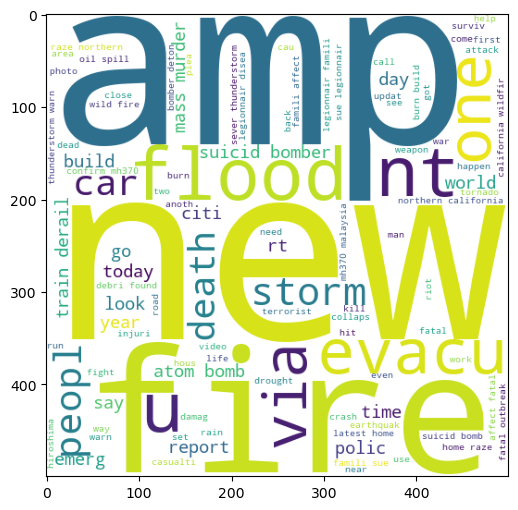

In [29]:
plt.figure(figsize= (15, 6))
plt.imshow(disaster_wc)

In [30]:
from wordcloud import WordCloud
wc= WordCloud(height= 500, width= 500, min_font_size= 10, background_color= 'white')
n_disaster_wc= wc.generate(data[0][data[0]['target']==0]['transformed_text'].str.cat(sep= " "))

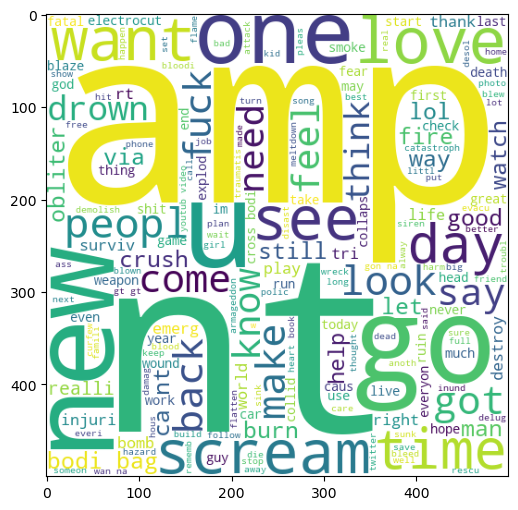

In [31]:
plt.figure(figsize= (15, 6))
plt.imshow(n_disaster_wc)

In [32]:
disaster_corpus=[]                                    # contains the list of all the words in disaster category

for msg in data[0][data[0]['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        disaster_corpus.append(word)
print(len(disaster_corpus))

31434


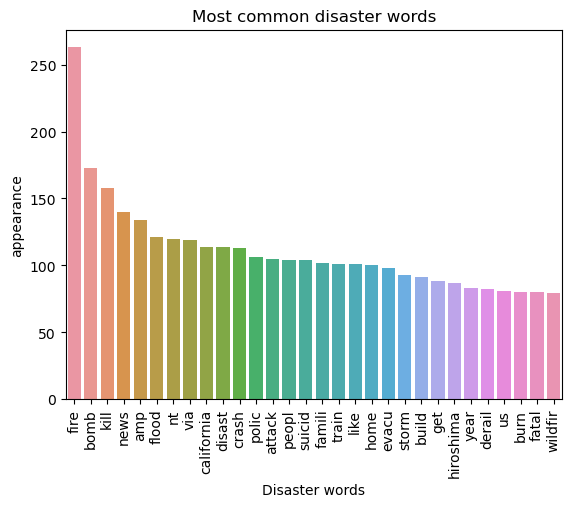

In [33]:
from collections import Counter
most_common_dis= pd.DataFrame(Counter(disaster_corpus).most_common(30))      #dictionary -> Df of most common 30 words in spam_corpus
sns.barplot(x= most_common_dis[0], y= most_common_dis[1]).set(title= 'Most common disaster words', xlabel= 'Disaster words', ylabel= 'appearance')
plt.xticks(rotation='vertical')
plt.show()

In [34]:
!pip install zeugma

In [35]:
from zeugma.embeddings import EmbeddingTransformer
glove = EmbeddingTransformer('glove')

In [38]:
df_train, df_test = train_test_split(data[0], test_size=0.2, random_state = 42)

In [39]:
x_train = glove.transform(df_train['transformed_text'])
x_test = glove.transform(df_test['transformed_text'])

y_train = df_train['target']
y_test = df_test['target']

In [40]:
# applying bag of words model or tfidf vectoriser to the transformed message

In [41]:
"""from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)"""

'from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\ncv= CountVectorizer()\ntfidf = TfidfVectorizer(max_features = 3000)'

In [42]:
"""bag_train = cv.fit_transform(data[0]['transformed_text'])
bag_train"""

"bag_train = cv.fit_transform(data[0]['transformed_text'])\nbag_train"

In [43]:
#bag_train.toarray()[0]

In [44]:
#bag_train= tfidf.fit_transform(data[0]['transformed_text'])
#bag_test= tfidf.fit_transform(data[1]['transformed_text'])

In [45]:
#print(bag_train.toarray().shape)

In [46]:
"""X = bag_train.toarray()
X= np.array(X)

X_test = bag_test.toarray()
X_test = np.array(X_test)"""

'X = bag_train.toarray()\nX= np.array(X)\n\nX_test = bag_test.toarray()\nX_test = np.array(X_test)'

In [47]:
#y = data[0]['target']
#y.shape

In [48]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
#x_train.shape

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [50]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7408637873754153
[[627 236]
 [154 488]]
0.6740331491712708


In [51]:
"""mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))"""

'mnb.fit(x_train, y_train)\ny_pred2 = mnb.predict(x_test)\nprint(accuracy_score(y_test, y_pred2))\nprint(confusion_matrix(y_test, y_pred2))\nprint(precision_score(y_test, y_pred2))'

In [52]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.7122923588039867
[[620 243]
 [190 452]]
0.6503597122302158


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier   

In [54]:
rf = RandomForestClassifier()
svc = svm.SVC(probability=True)
xgb = XGBClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
adb = AdaBoostClassifier()
etc = ExtraTreesClassifier()

In [55]:
models = {
    'RF' : rf,
    'SVM' : svc,
    'XGB' : xgb,
    'LR' : lr,
    'KNN' : knn,
    'ADAB' : adb,
    'ETC' : etc, 
    'BNB' : bnb
}

In [56]:
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

In [57]:
scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    scores.append([name, accuracy, precision])

print(scores)

/Users/avinandan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[['RF', 0.7767441860465116, 0.7908745247148289], ['SVM', 0.7794019933554818, 0.7969348659003831], ['XGB', 0.7687707641196013, 0.7525773195876289], ['LR', 0.7654485049833887, 0.7557522123893805], ['KNN', 0.7441860465116279, 0.6992248062015504], ['ADAB', 0.7574750830564784, 0.7359454855195912], ['ETC', 0.7780730897009966, 0.7916666666666666], ['BNB', 0.7122923588039867, 0.6503597122302158]]


In [58]:
scores_df= pd.DataFrame(scores, columns=['model_name', 'accuracy', 'precision'])
scores_df.sort_values('precision', ascending= False)

,model_name,accuracy,precision
1,SVM,0.779402,0.796935
6,ETC,0.778073,0.791667
0,RF,0.776744,0.790875
3,LR,0.765449,0.755752
2,XGB,0.768771,0.752577
5,ADAB,0.757475,0.735945
4,KNN,0.744186,0.699225
7,BNB,0.712292,0.650360


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [60]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
voting_clf = VotingClassifier(estimators= [('etc', etc),('knn', knn), ('lr', lr), ('svm', svc)], voting = 'soft')
voting_clf.fit(x_train, y_train)
y_pred_vc = voting_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_vc))
print(precision_score(y_test, y_pred_vc))

0.7740863787375415
0.7706093189964157


In [63]:
# Define hyperparameters to tune for each model
etc_params = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 5, 10, 20],
    # Add more Extra Trees Classifier hyperparameters here
}

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    # Add more K-Nearest Neighbors hyperparameters here
}

lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    # Add more Logistic Regression hyperparameters here
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # Add more Support Vector Machine hyperparameters here
}


In [66]:
# Perform Randomized Search for each model
etc_random_search = RandomizedSearchCV(etc, param_distributions=etc_params, n_iter=100, cv=5)
knn_random_search = RandomizedSearchCV(knn, param_distributions=knn_params, n_iter=100, cv=5)
lr_random_search = RandomizedSearchCV(lr, param_distributions=lr_params, n_iter=100, cv=5)
svm_random_search = RandomizedSearchCV(svc, param_distributions=svm_params, n_iter=100, cv=5)

# Fit Randomized Search for each model
etc_random_search.fit(x_train, y_train)
knn_random_search.fit(x_train, y_train)
lr_random_search.fit(x_train, y_train)
svm_random_search.fit(x_train, y_train)

# Get best estimators for each model
best_etc = etc_random_search.best_estimator_
best_knn = knn_random_search.best_estimator_
best_lr = lr_random_search.best_estimator_
best_svm = svm_random_search.best_estimator_

/Users/avinandan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/avinandan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/avinandan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [68]:
voting_clf = VotingClassifier(estimators=[('etc', best_etc), ('knn', best_knn), ('lr', best_lr), ('svm', best_svm)], voting='hard')

# Fit Voting Classifier
voting_clf.fit(x_train, y_train)

# Evaluate the Voting Classifier
accuracy = voting_clf.score(x_test, y_test)
print("Voting Classifier accuracy:", accuracy)

Voting Classifier accuracy: 0.7794019933554818


In [69]:
X_test = glove.transform(data[1]['transformed_text'])

In [71]:
test_preds = voting_clf.predict(X_test)
test_preds

array([1, 0, 1, ..., 1, 1, 1])

In [72]:
test_df

,text,transformed_text
id,,
0,Just happened a terrible car crash,happen terribl car crash
2,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
3,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...
9,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan
...,...,...
10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquak safeti lo angel safeti fasten xrwn
10865,Storm in RI worse than last hurricane. My city...,storm ri wors last hurrican citi amp 3other ha...
10868,Green Line derailment in Chicago http://t.co/U...,green line derail chicago


In [73]:
len(test_preds)

3263

In [74]:
final_df = pd.DataFrame(test_df.index)
final_df['target'] = test_preds

In [75]:
final_df.set_index('id', inplace = True)

In [76]:
final_df.to_csv('predictions.csv')

In [77]:
import pickle

# Save the model to a file
with open('disaster_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)